In [51]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sea
import string
import nltk
import re
import sys
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
# Завдання 1
# Посилання на датасет https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021
suicide = pandas.read_csv("/home/anatoliy/Downloads/master.csv")
print("Raws,Columns:")
print(suicide.shape)
suicide = suicide.dropna() 
suicide.isnull().sum()

Raws,Columns:
(31756, 12)


country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [53]:
# Нормалізація даних
suicide_only_numbers  = suicide.drop(columns=['sex', 'age', 'country-year', 'generation', ' gdp_for_year ($) '], axis=1).set_index('country') #Getting numbers
X = suicide_only_numbers.drop(['year'], axis=1)
Y = suicide_only_numbers['year']
scaler = StandardScaler()
suicide_scaler = scaler.fit_transform(x)
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(suicide_scaler)
print (pca_result)

[[-1.96159143  0.14110386]
 [-1.96553834  0.12242914]
 [-1.96941497  0.11034444]
 ...
 [ 2.90709989  0.0337437 ]
 [-0.04119148 -0.50244908]
 [-1.36277556 -0.09747695]]


<AxesSubplot: xlabel='first_pca_column', ylabel='second_pca_column'>

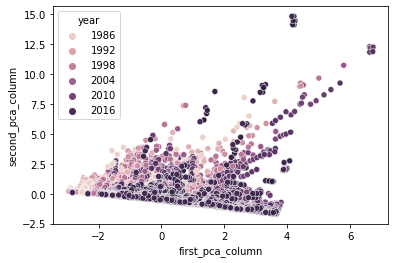

In [54]:
#РСА
pca_result = pd.DataFrame({'first_pca_column': pca_result[:,0], 'second_pca_column': pca_result[:,1], 'year': y})
sns.scatterplot(x='first_pca_column', y='second_pca_column', hue='year', data=pca_result)

In [55]:
#TSNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(suicide_only_numbers)
print (tsne_result)

[[-67.03915    32.69271  ]
 [-91.30769    24.971144 ]
 [-71.04836   -43.61963  ]
 ...
 [112.19806    15.130503 ]
 [ 24.524202   -4.2545404]
 [ 80.18052    38.099377 ]]


<AxesSubplot: xlabel='first_tsne_column', ylabel='second_tsne_column'>

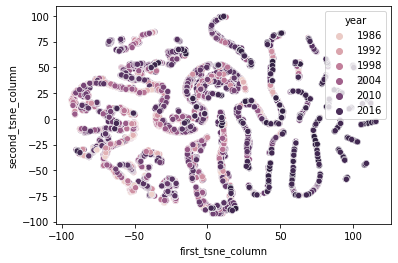

In [56]:
tsne_result = pd.DataFrame({'first_tsne_column': tsne_result[:,0], 'second_tsne_column': tsne_result[:,1], 'year': y})
sns.scatterplot(x='first_tsne_column', y='second_tsne_column', hue='year', data=tsne_result)

In [57]:
#Завдання 2, в якості фото обрав бужекоровку
n_colors = [64, 32, 16, 8]
image_photo = Image.open("/home/anatoliy/Downloads/lab2.jpg")
image = np.array(image_photo, dtype=np.float64) / 255
image

array([[[0.07058824, 0.06666667, 0.12941176],
        [0.11372549, 0.11372549, 0.15294118],
        [0.11764706, 0.10980392, 0.11372549],
        ...,
        [0.09803922, 0.10588235, 0.0627451 ],
        [0.1372549 , 0.13333333, 0.11764706],
        [0.08235294, 0.07843137, 0.07058824]],

       [[0.01568627, 0.01960784, 0.03921569],
        [0.56078431, 0.56078431, 0.56078431],
        [0.88235294, 0.88235294, 0.84313725],
        ...,
        [0.76470588, 0.77647059, 0.70196078],
        [0.84705882, 0.84705882, 0.8       ],
        [0.30588235, 0.30588235, 0.26666667]],

       [[0.        , 0.00784314, 0.        ],
        [0.63529412, 0.64705882, 0.56470588],
        [0.9372549 , 0.94901961, 0.82745098],
        ...,
        [0.71372549, 0.74509804, 0.59215686],
        [0.95686275, 0.97647059, 0.85098039],
        [0.31764706, 0.3372549 , 0.21960784]],

       ...,

       [[0.01176471, 0.        , 0.        ],
        [0.63137255, 0.63529412, 0.58039216],
        [0.80784314, 0

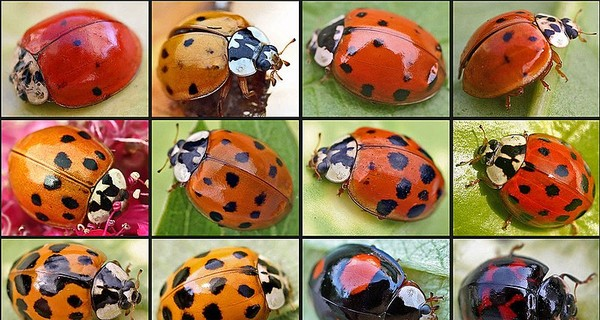

In [58]:
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))
assert d == 3
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
image_photo
#Оригінальне зображення

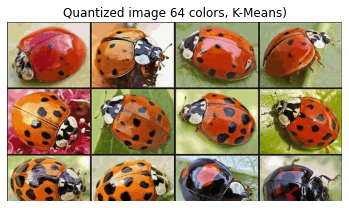

In [62]:
#64
kmeans_64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
labels_64 = kmeans_64.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 64 colors, K-Means)")
plot.imshow(recreate_image(kmeans_64.cluster_centers_, labels_64, w, h))

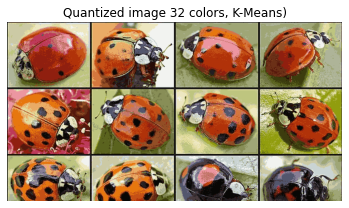

In [63]:
#32
kmeans_32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
labels_32 = kmeans_32.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 32 colors, K-Means)")
plot.imshow(recreate_image(kmeans_32.cluster_centers_, labels_32, w, h))

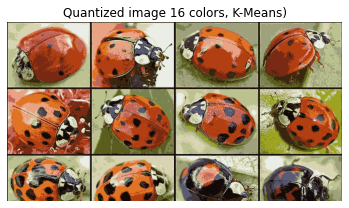

In [64]:
#16
kmeans_16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
labels_16 = kmeans_16.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 16 colors, K-Means)")
plot.imshow(recreate_image(kmeans_16.cluster_centers_, labels_16, w, h))

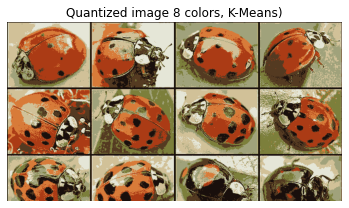

In [65]:
#8
kmeans_8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
labels_8 = kmeans_8.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 8 colors, K-Means)")
plot.imshow(recreate_image(kmeans_8.cluster_centers_, labels_8, w, h))